In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from pandas.plotting import bootstrap_plot
import numpy as np
import pandas as pd
import bcolz
import threading

import os
import sys
import glob
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [55]:
dataset1 = pd.read_csv('dataset/target.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5ba9b7790>]],
      dtype=object)

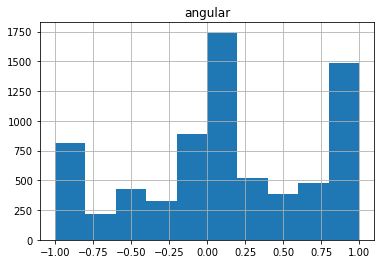

In [56]:
dataset1.hist(column='angular', bins=10)

In [57]:
dataset = dataset1.drop(dataset1.index[0:120])
dataset = dataset.drop(dataset.index[923:1020])
dataset = dataset.drop(dataset.index[2960:3120])
dataset = dataset.drop(dataset.index[5070:5304])
dataset = dataset.drop(dataset.index[5343:5500])
dataset = dataset.drop(dataset.index[6817:7037])
dataset = dataset.drop(dataset.index[7051:])

In [58]:
dataset.describe()

,id,linear,angular
count,6527.00000,6527.000000,6527.000000
mean,3634.43772,0.160616,0.125301
std,2085.86284,0.076977,0.626624
min,120.00000,0.000000,-1.000000
25%,1848.50000,0.140883,-0.199387
50%,3640.00000,0.169892,0.021191
75%,5271.50000,0.198900,0.710861
max,7294.00000,0.497291,1.000000


In [93]:
dataset2 = pd.read_csv('older/dataset/target.csv')
dataset2.describe()

,id,linear,angular
count,5497.000000,5497.000000,5497.000000
mean,2748.000000,0.148244,0.048859
std,1586.991546,0.062030,0.612604
min,0.000000,-1.088268,-1.000000
25%,1374.000000,0.132595,-0.312049
50%,2748.000000,0.157459,0.040627
75%,4122.000000,0.178180,0.471901
max,5496.000000,0.527557,1.000000


In [70]:
dataux = dataset2.drop(dataset2.index[0:30])
dataux = dataux.drop(dataux.index[2193:2300])
dataux = dataux.drop(dataux.index[5270:])

In [71]:
dataux.describe()

,id,linear,angular
count,5270.000000,5270.000000,5270.000000
mean,2726.974194,0.152881,0.048553
std,1566.735986,0.057715,0.625434
min,30.000000,-1.088268,-1.000000
25%,1347.250000,0.140883,-0.343145
50%,2771.500000,0.157459,-0.000000
75%,4088.750000,0.182324,0.518514
max,5406.000000,0.527557,1.000000


In [72]:
val_cnt = dataux['angular'].value_counts()
val_cnt.head(10)

 1.000000    667
-1.000000    661
-0.000000    390
 0.141659    113
 0.133885     77
 0.056175     71
 0.040627     67
-0.098355     56
 0.145546     53
-0.191613     45
Name: angular, dtype: int64

In [73]:
dataset.tail(3)

,id,linear,angular,target
7292,7292,0.0,-0.008984,"[0.0, -0.00898368563503027]"
7293,7293,0.0,-0.008984,"[0.0, -0.00898368563503027]"
7294,7294,0.0,-0.008984,"[0.0, -0.00898368563503027]"


In [74]:
dataux['id'] = dataux['id'] + 7295
dataux.head()

,id,linear,angular,target
30,7325,0.078722,0.122223,"[0.07872170209884644, 0.12222341448068619]"
31,7326,0.078722,0.122223,"[0.07872170209884644, 0.12222341448068619]"
32,7327,0.078722,0.227143,"[0.07872170209884644, 0.2271428406238556]"
33,7328,0.078722,0.238772,"[0.07872170209884644, 0.23877200484275818]"
34,7329,0.078722,0.250433,"[0.07872170209884644, 0.2504332959651947]"


In [75]:
df = dataset.append(dataux, ignore_index=True)

In [76]:
df.describe()

,id,linear,angular
count,11797.000000,11797.000000,11797.000000
mean,6487.901924,0.157160,0.091016
std,3686.283609,0.069144,0.627228
min,120.000000,-1.088268,-1.000000
25%,3166.000000,0.140883,-0.284871
50%,6666.000000,0.165748,0.021191
75%,9752.000000,0.190612,0.638982
max,12701.000000,0.527557,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5b9a3db50>]],
      dtype=object)

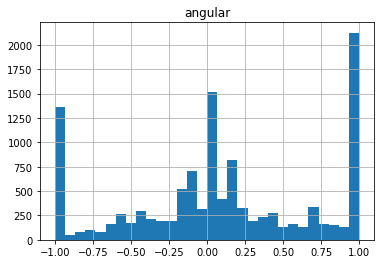

In [82]:
df.hist(column='angular', bins=30)

In [83]:
df.to_csv('cleaned.csv')

In [99]:
####rename images and copy them to the original dataset folder
import os
names = []
for afile in os.listdir('older/dataset/'):
    filename, file_extension = os.path.splitext(afile)
    if file_extension == '.bmp':
        number = int(filename) + 7295 ## cambiar con el offset
        os.rename(afile, str(number) + file_extension)


OSError: [Errno 2] No such file or directory

In [97]:
len(names)

5497